In [1]:
from datetime import datetime
import backtrader as bt
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


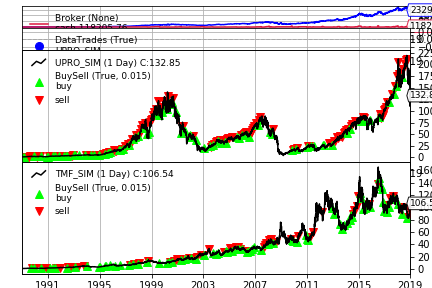

[[<Figure size 432x288 with 6 Axes>]]

In [13]:
class Strat(bt.Strategy):
    def __init__(self):
        self.UPRO = self.datas[0]
        self.TMF = self.datas[1]
        self.counter = 0
        
    def next(self):
        if  self.counter % 20 == 0:
            self.order_target_percent(self.UPRO, target=.5)
            self.order_target_percent(self.TMF, target=.5)
        self.counter += 1


start = datetime(1999,1,1)
end = datetime(2019,1,1)

cerebro = bt.Cerebro()

upro = bt.feeds.YahooFinanceCSVData(dataname='../data/UPRO_SIM.csv')
tmf = bt.feeds.YahooFinanceCSVData(dataname='../data/TMF_SIM.csv')

cerebro.adddata(upro)
cerebro.adddata(tmf)

cerebro.addstrategy(Strat)
cerebro.addanalyzer(bt.analyzers.PyFolio, _name='pyfolio') 

results = cerebro.run()
cerebro.plot()

In [11]:
import pyfolio as pf

/usr/local/lib/python3.7/site-packages/pyfolio/pos.py:27: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  'Module "zipline.assets" not found; mutltipliers will not be applied' +


Start date,1989-01-03
End date,2019-01-02
Total months,360
,Backtest
Annual return,19.9%
Cumulative returns,23198.3%
Annual volatility,24.4%
Sharpe ratio,0.87
Calmar ratio,0.42
Stability,0.92
Max drawdown,-47.9%


<IPython.core.display.Javascript object>


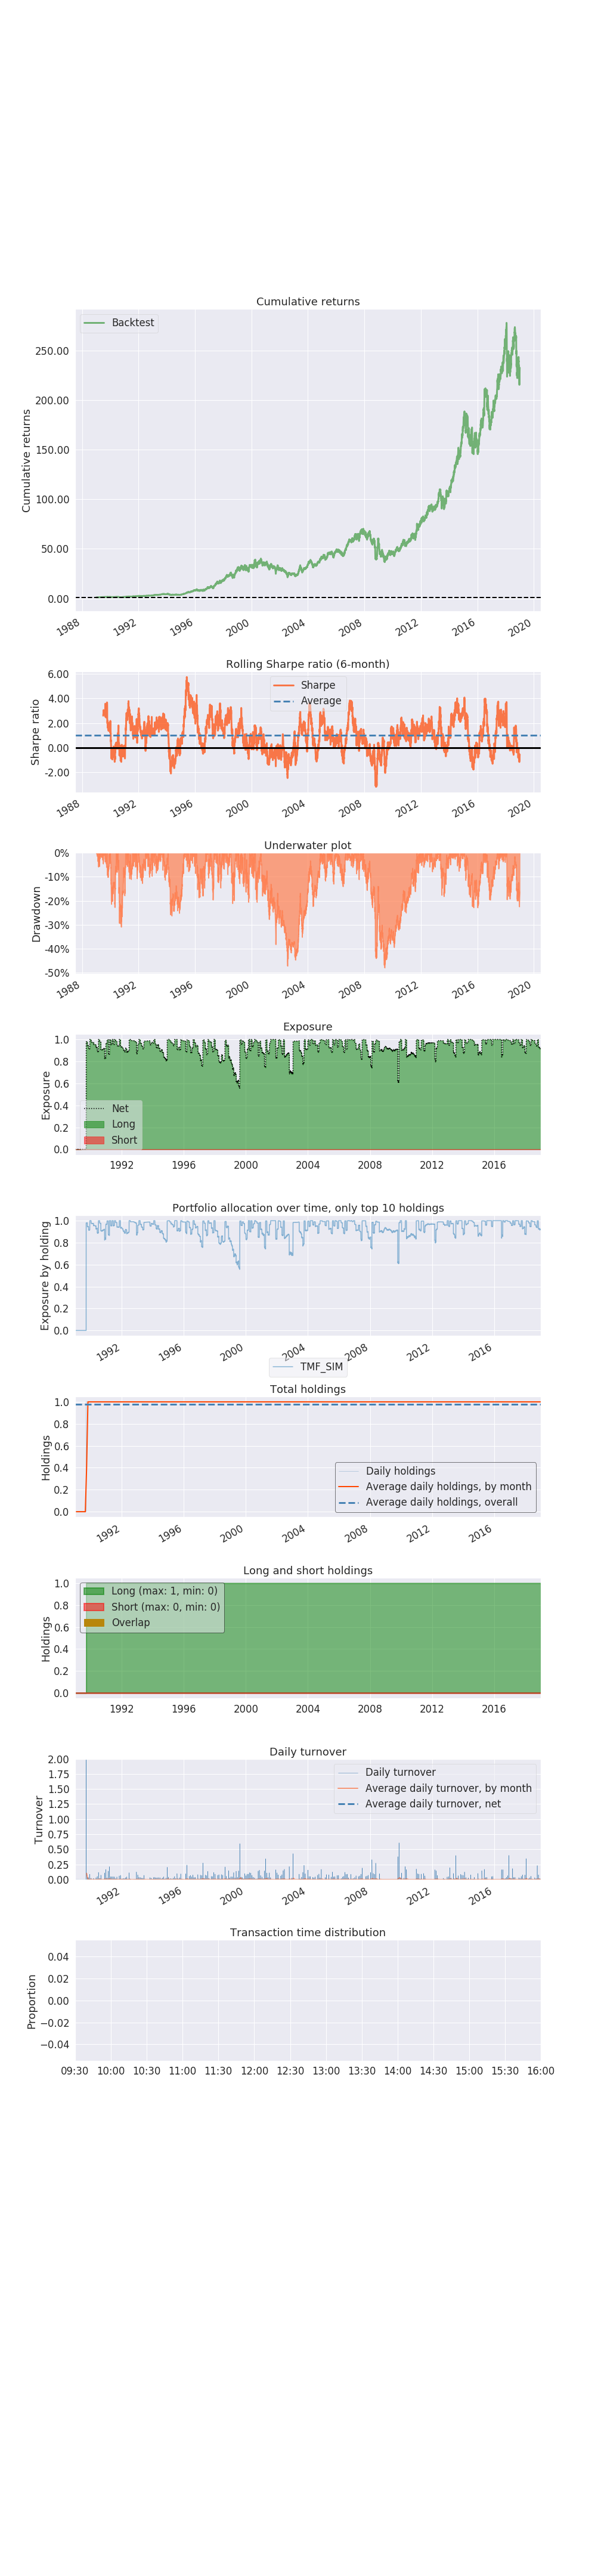

In [16]:

strat = results[0]
pyfoliozer = strat.analyzers.getbyname('pyfolio')
returns, positions, transactions, gross_lev = pyfoliozer.get_pf_items()
pf.create_simple_tear_sheet(returns, positions=positions, transactions=transactions,)